In [1]:
using SparseArrays
using LinearAlgebra
using NLopt
using KrylovKit
using Statistics
using FiniteDifferences
using Revise
using TopologyOptimizationHelper

┌ Warning: The active manifest file has dependencies that were resolved with a different julia version (1.11.5). Unexpected behavior may occur.
└ @ C:\Users\jorge\.julia\dev\TopologyOptimizationHelper\Manifest.toml:0
┌ Warning: The project dependencies or compat requirements have changed since the manifest was last resolved.
│ It is recommended to `Pkg.resolve()` or consider `Pkg.update()` if necessary.
└ @ Pkg.API C:\Users\jorge\.julia\juliaup\julia-1.10.4+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Pkg\src\API.jl:1807
Precompiling TopologyOptimizationHelper
  ✓ TopologyOptimizationHelper
  1 dependency successfully precompiled in 36 seconds. 92 already precompiled.


In [2]:
using PyPlot
using DelimitedFiles

In [3]:
L = 5
res = 50
ε = ones(res * (L + 1))
M = length(ε) 
ω = 2π
_, x = Maxwell1d(L, ε, ω; resolution=res)

b = zeros(M)
b[M÷2] = 1;

In [4]:
ε_vac = ones(M)
A_vac, _ = Maxwell1d(L, ε_vac, ω; resolution=res)
u = A_vac \ b
@show LDOS_vac = -imag(u' * b)

LDOS_vac = -(imag(u' * b)) = 0.0015894422269321887


0.0015894422269321887

In [5]:
custom_epsilon = Fabry_Perot_epsilon.(L, x; λ=1);

In [6]:
A, _ = Maxwell1d(L, custom_epsilon, ω; resolution=res)
ω₀ = sqrt(Arnoldi_eig(A, custom_epsilon, ω, b)[1])
@show Q_fp = -real(ω₀) / 2imag(ω₀)

Q_fp = -(real(ω₀)) / (2 * imag(ω₀)) = 3.9663413059788436e7


3.9663413059788436e7

In [7]:
LDOS_init, ε_init, init_LDOS_vals, init_omegas, x = LDOS_Optimize(L, ε, ω, b; resolution=res, ftol=0, max_eval=200)

numevals = opt.numevals = 200
ω₀_opt = 6.283103517649515 - 0.001460917320955166im
Q_opt = 2150.3966814294267


(1.2209566915971422, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0015894422269321887, 0.0016083907502234757, 0.0018105515374050593, 0.0014885737486222837, 0.0030250626916708072, 0.0005602595939346139, 0.0023243971283789014, 0.00829984026246054, 0.0017093821912479478, 0.0006435485280975625  …  1.0812741387229683, 1.1526709140187306, 1.0121749887542193, 1.1582022237440066, 0.8359764104189054, 1.1668279728922548, 1.1698936102337314, 1.1808319300091843, 1.1849380988527116, 1.2209566915971422], ComplexF64[5.764179529545764 - 2.1834196863703044im, 6.306450682484092 - 1.3421123542299582im, 6.270732721744384 - 0.7851245718363641im, 5.915312493573094 - 0.13861198538304537im, 6.117101653676185 - 0.30613111198531323im, 6.503468705354755 - 0.10189806362692487im, 6.0908956805268595 - 0.044283804951738254im, 6.23455376323418 - 0.13783960938895362im, 6.172987067771398 - 0.1574197603682974im, 6.03520732910533 - 0.0063924057861181344im  … 

In [8]:
LDOS_opt, ε_opt, LDOS_vals, omegas, x = LDOS_Optimize(L, ε_init, ω, b; resolution=res, ftol=0, max_eval=1000)

numevals = opt.numevals = 1000
ω₀_opt = 6.2831860142467475 - 0.00017131088161136023im
Q_opt = 18338.549061060017


(10.687687960695797, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.2209566915971422, 0.00015041517773171505, 0.0005727285768463352, 0.003292739422987484, 0.016656903401891326, 0.11177489153802725, 0.5977027403469536, 0.7758106881067147, 1.216285741784868, 1.224023854360724  …  10.664826160153101, 0.4759568623847154, 8.961172962165335, 10.667048610623896, 10.673799836890208, 10.683597837580477, 1.8317936268385107, 10.245814351521565, 10.68601037866854, 10.687687960695797], ComplexF64[6.283103517649515 - 0.001460917320955166im, 6.411417444749104 - 0.002672429833475003im, 6.350041931223999 - 0.0020467209026408663im, 6.311008602803287 - 0.0016671833006714656im, 6.295554810538791 - 0.0015398714370567935im, 6.2877749463394395 - 0.0014880464031422913im, 6.284671341177748 - 0.0014692397186978929im, 6.284287076698545 - 0.00146694863318074im, 6.283293797605156 - 0.0014618678884499683im, 6.28317043098543 - 0.0014612514986818927im  …  6

In [9]:
mod_LDOS_opt, mod_ε_opt, mod_LDOS_vals, mod_omegas, x = mod_LDOS_Optimize(L, ε_init, ω, b, b; ftol=0, resolution=res, max_eval=1000)

numevals = opt.numevals = 1000
ω₀ = 6.283185184267129 - 2.1748194470899754e-5im
Q = 144453.0301739385


(137.92138961663963, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.2244612571205846, 1.2601308952657269, 1.4838101453026808, 5.664644174689674, 15.98831789877583, 25.59968839677206, 31.448666508764266, 31.42489452004407, 35.89433856235083, 43.22959540729363  …  137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963, 137.92138961663963], ComplexF64[6.283103517649515 - 0.001460917320955166im, 6.28570052687152 - 0.0014290985706796526im, 6.293151305451733 - 0.0012290909630711317im, 6.31638575328337 - 0.00033163108728961205im, 6.3072095736227745 - 0.00014134043452504493im, 6.283733344679664 - 9.730276770844719e-5im, 6.283096689766764 - 8.010323414214404e-5im, 6.283196892436537 - 8.016128040185708e-5im, 6.283617687522387 - 7.274262322425541e-5im, 6.283853174884397 - 6.480223332869028e-5im  …  6.28318518426712

In [10]:
A, x = Maxwell1d(L, ε_init, ω; resolution=res)
@show ω₀_init = sqrt(Arnoldi_eig(A, vec(ε_init), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(ε_init))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - ω₀_init^2); rev = false), Arnoldi()) 
u_init = abs.(vecs[1]).^2

A, x = Maxwell1d(L, ε_opt, ω; resolution=res)
@show ω₀_opt = sqrt(Arnoldi_eig(A, vec(ε_opt), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(ε_opt))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - ω₀_opt^2); rev = false), Arnoldi()) 
u_opt = abs.(vecs[1]).^2

A, x = Maxwell1d(L, mod_ε_opt, ω; resolution=res)
@show mod_ω₀_opt = sqrt(Arnoldi_eig(A, vec(mod_ε_opt), ω, vec(b))[1])
E⁻¹ = spdiagm(1 ./ vec(mod_ε_opt))
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, vec(b), 1, EigSorter(λ -> abs(λ - mod_ω₀_opt^2); rev = false), Arnoldi()) 
mod_u_opt = abs.(vecs[1]).^2

true_max = maximum(vcat(u_init, u_opt, mod_u_opt));

ω₀_init = sqrt((Arnoldi_eig(A, vec(ε_init), ω, vec(b)))[1]) = 6.283103517649515 - 0.001460917320955166im


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (9.10e-01)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


ω₀_opt = sqrt((Arnoldi_eig(A, vec(ε_opt), ω, vec(b)))[1]) = 6.2831860142467475 - 0.00017131088161136023im
mod_ω₀_opt = sqrt((Arnoldi_eig(A, vec(mod_ε_opt), ω, vec(b)))[1]) = 6.283185184267129 - 2.1748194470899754e-5im

┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (2.25e-01)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (8.70e-02)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


In [11]:
rc("font", family="serif", serif="Times New Roman")
rc("mathtext", fontset="cm")
rc("xtick", labelsize=11.5)  # x-axis tick labels
rc("ytick", labelsize=12)  # y-axis tick labels

sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


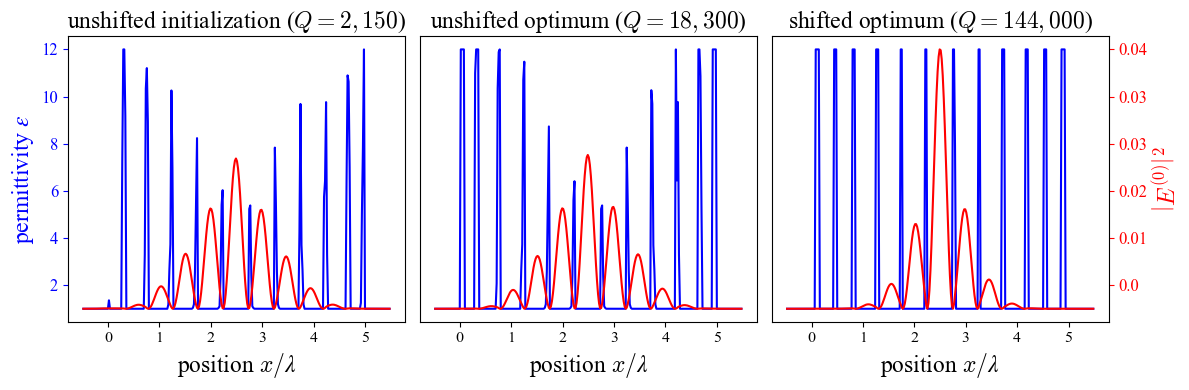

In [12]:
figure(figsize=(12, 4))

subplot(1, 3, 1)
plot(x, ε_init, "b-")
plot(x, (11/true_max)u_init .+ 1, color="red")
title(L"unshifted initialization ($Q = 2,150$)", fontsize=17)
ylabel(L"permittivity $ε$", color="blue", fontsize=17)
gca().tick_params(axis="y", colors="blue")
xlabel(L"position $x / λ$", fontsize=17)


subplot(1, 3, 2)
plot(x, ε_opt, color="blue")
plot(x, (11/true_max)u_opt .+ 1, color="red")
yticks([])
title(L"unshifted optimum ($Q = 18,300$)", fontsize=17)
xlabel(L"position $x / λ$", fontsize=17)

subplot(1, 3, 3)
plot(x, mod_ε_opt, color="blue")
plot(x, (11/true_max)mod_u_opt .+ 1, color="red")
ylabel(L"$\left|E^{(0)}\right|^2$", color="red", fontsize=17)
gca().tick_params(axis="y", colors="red")
gca().yaxis.tick_right()        # move ticks to the right
gca().yaxis.set_label_position("right")  # move label to the right
ytick = gca().get_yticks()
gca().set_yticklabels(string.(round.(true_max .* (ytick .- 1) ./ 11; digits=2)))
title(L"shifted optimum ($Q = 144,000$)", fontsize=17)
xlabel(L"position $x / λ$", fontsize=17)

tight_layout()
savefig("cavities_1d.pdf")

In [13]:
function make_smooth_plot(lst)
    current = lst[1]
    output = Float64[current]
    for i in 2:length(lst)
        lst_i = lst[i]
        if lst_i > current
            current = lst_i
        end

        push!(output, current)
    end

    return output
end

make_smooth_plot (generic function with 1 method)

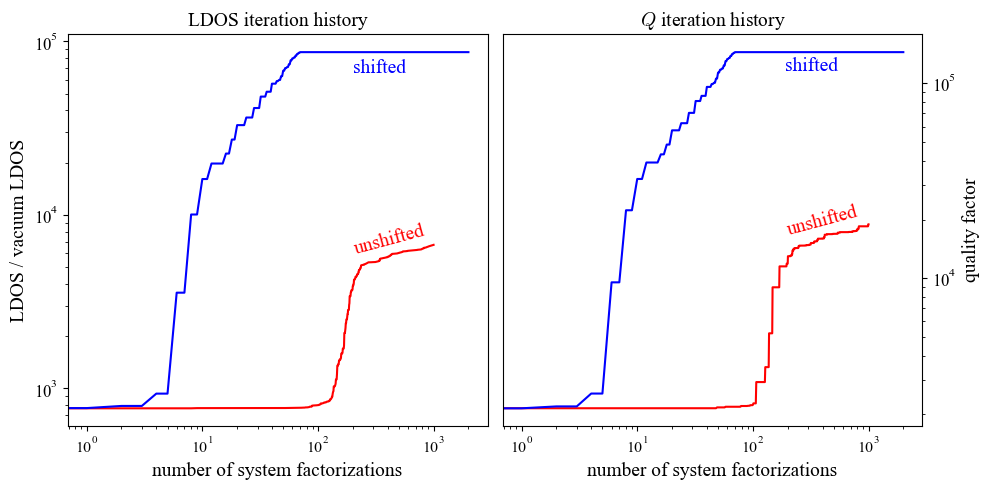

In [14]:
figure(figsize=(10, 5))

subplot(1, 2, 1)
loglog(make_smooth_plot(LDOS_vals) / LDOS_vac, color="red")
loglog(vcat(fill.(make_smooth_plot(mod_LDOS_vals), 2)...) / LDOS_vac, color="blue")
title("LDOS iteration history", fontsize=14)
ylabel("LDOS / vacuum LDOS", fontsize=14)
xlabel("number of system factorizations", fontsize=14)
text(2e2, 6.6e4, "shifted", color="blue", fontsize=14)
text(2e2, 6e3, "unshifted", color="red", fontsize=14, rotation=15)
# Right plot
subplot(1, 2, 2)
loglog(make_smooth_plot(-real.(omegas) ./ 2imag.(omegas)), color="red")
loglog(vcat(fill.(make_smooth_plot(-real.(mod_omegas) ./ 2imag.(mod_omegas)), 2)...), color="blue")
title(L"$Q$ iteration history", fontsize=14)
ylabel("quality factor", fontsize=14)
gca().yaxis.tick_right()        # move ticks to the right
gca().yaxis.set_label_position("right")  # move label to the right
xlabel("number of system factorizations", fontsize=14)
text(1.9e2, 1.15e5, "shifted", color="blue", fontsize=14)
text(1.9e2, 1.67e4, "unshifted", color="red", fontsize=14, rotation=15)

tight_layout()
savefig("plots1d.pdf")

In [15]:
function succ_ref(L, L₀, ε_init, ω, b, x₀; resolution=res, max_eval=50, step=1, ftol=1e-4)
    _, ε, LDOS_vals, omegas, x =  LDOS_Optimize(L, ε_init, ω, b; resolution, ftol=0, max_eval, design_width=L₀)
    _, mod_ε_opt, mod_LDOS_vals, mod_omegas, _ = mod_LDOS_Optimize(L, ε, ω, b, x₀; resolution, max_eval, design_width=L₀ + step, ftol)
    append!(LDOS_vals, mod_LDOS_vals)
    append!(omegas, mod_omegas)
    
    n = 2
    while L₀ + (n-1) * step < L
        LDOS, mod_ε_opt, mod_LDOS_vals, mod_omegas, _ = mod_LDOS_Optimize(L, mod_ε_opt, ω, b, x₀; resolution, max_eval, design_width=min(L₀ + n * step, L), ftol)
        append!(LDOS_vals, mod_LDOS_vals)
        append!(omegas, mod_omegas)
        n += 1
    end

    return mod_ε_opt, LDOS_vals, omegas
end

succ_ref (generic function with 1 method)

In [16]:
function succ_ref_no_mod(L, L₀, ε_init, ω, b; resolution=res, max_eval=50, step=1, ftol=1e-4, fixed_inner=false)
    _, ε, LDOS_vals, omegas, x =  LDOS_Optimize(L, ε_init, ω, b; resolution, ftol=0, max_eval, design_width=L₀)
    _, new_ε_opt, new_LDOS_vals, new_omegas, _ = LDOS_Optimize(L, ε, ω, b; resolution, max_eval, design_width=L₀ + step, ftol)
    append!(LDOS_vals, new_LDOS_vals)
    append!(omegas, new_omegas)
    
    n = 2
    while L₀ + (n-1) * step < L
        fixed_width = fixed_inner && n > 2 ? L₀ + (n - 1) * step : 0.0
        LDOS, new_ε_opt, new_LDOS_vals, new_omegas, _ = LDOS_Optimize(L, new_ε_opt, ω, b; resolution, max_eval, design_width=min(L₀ + n * step, L), ftol, fixed_width)
        append!(LDOS_vals, new_LDOS_vals)
        append!(omegas, new_omegas)
        n += 1
    end

    return new_ε_opt, LDOS_vals, omegas
end

succ_ref_no_mod (generic function with 1 method)

In [17]:
step = 0.55

0.55

In [18]:
best_ε_opt, all_LDOS_vals, all_omegas = succ_ref(L, 1, ε, ω, b, b; resolution=res, max_eval=100, step, ftol=0)

numevals = opt.numevals = 100
ω₀_opt = 6.279460528935278 - 0.26212299059942856im
Q_opt = 11.978080431966823
numevals = opt.numevals = 100
ω₀ = 6.283185283538906 - 0.020057294008584716im
Q = 156.63093139208215
numevals = opt.numevals = 100
ω₀ = 6.28318544017552 - 0.0016739429563815732im
Q = 1876.7621131359733
numevals = opt.numevals = 100
ω₀ = 6.2831853076190125 - 0.00013752490590552744im
Q = 22843.80878593452
numevals = opt.numevals = 100
ω₀ = 6.283185256047074 - 1.1502052665721064e-5im
Q = 273133.21537696075
numevals = opt.numevals = 100
ω₀ = 6.283185130355876 - 9.69555979164376e-7im
Q = 3.240238452126879e6
numevals = opt.numevals = 100
ω₀ = 6.283185203637805 - 8.428788762622561e-8im
Q = 3.727217148625536e7
numevals = opt.numevals = 100
ω₀ = 6.283185323358362 - 7.329094550026456e-9im
Q = 4.2864676396729535e8
numevals = opt.numevals = 100
ω₀ = 6.283185307213386 - 7.329094530880853e-9im
Q = 4.286467639856077e8


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0015894422269321887, 0.0015932148999995763, 0.001631207981861311, 0.002200842232487165, 0.0012644143516178726, 0.002446919241034733, 0.005091892732486142, 0.007294122407440161, 0.002302283958535247, 0.013152809414975878  …  612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582, 612535.3548120582], ComplexF64[5.764179529545764 - 2.1834196863703044im, 5.762936643483027 - 2.184254760181721im, 5.750951691641168 - 2.1925685704139988im, 6.237802858388018 - 1.87042736046718im, 7.101520235204989 - 0.740389672867644im, 5.432067897901122 - 0.6308825980932127im, 5.995207476997895 - 0.740060219220602im, 5.958429072587017 - 0.260507832301084im, 7.292811847423832 - 0.2848310831415152im, 6.3641652115094836 - 0.3782952815986345im  …  6.283185307213386 - 7.329094530880836e-9im, 6.2

In [19]:
new_ε_opt, new_LDOS_vals, new_omegas = succ_ref_no_mod(L, 1, ε, ω, b; resolution=res, max_eval=100, step, ftol=0)

numevals = opt.numevals = 100
ω₀_opt = 6.279460528935278 - 0.26212299059942856im
Q_opt = 11.978080431966823
numevals = opt.numevals = 100
ω₀_opt = 6.28258529645083 - 0.022648156401272154im
Q_opt = 138.6997066149264
numevals = opt.numevals = 100
ω₀_opt = 6.28309178197463 - 0.0019462718284345873im
Q_opt = 1614.1352123018205
numevals = opt.numevals = 100
ω₀_opt = 6.283179277130232 - 0.0018896330837495018im
Q_opt = 1662.5394980550516
numevals = opt.numevals = 100
ω₀_opt = 6.28323035682567 - 0.0006067292306949728im
Q_opt = 5177.952568420511
numevals = opt.numevals = 100
ω₀_opt = 6.28319626155658 - 0.00024580851004158956im
Q_opt = 12780.672769412042
numevals = opt.numevals = 100
ω₀_opt = 6.283190858568325 - 0.00023473601299756443im
Q_opt = 13383.525557779492
numevals = opt.numevals = 100
ω₀_opt = 6.28316868252739 - 0.00018253972459342463im
Q_opt = 17210.41460022483
numevals = opt.numevals = 100
ω₀_opt = 6.283170939336218 - 0.00013893283167753303im
Q_opt = 22612.261131766292


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0015894422269321887, 0.0015932148999995763, 0.001631207981861311, 0.002200842232487165, 0.0012644143516178726, 0.002446919241034733, 0.005091892732486142, 0.007294122407440161, 0.002302283958535247, 0.013152809414975878  …  28.023657797076496, 28.206594365910313, 28.724231071109365, 9.91472673506015, 28.784198285211627, 29.660573058663676, 30.018369942405744, 30.223089610778075, 31.680690192109182, 4.448064116847581], ComplexF64[5.764179529545764 - 2.1834196863703044im, 5.762936643483027 - 2.184254760181721im, 5.750951691641168 - 2.1925685704139988im, 6.237802858388018 - 1.87042736046718im, 7.101520235204989 - 0.740389672867644im, 5.432067897901122 - 0.6308825980932127im, 5.995207476997895 - 0.740060219220602im, 5.958429072587017 - 0.260507832301084im, 7.292811847423832 - 0.2848310831415152im, 6.3641652115094836 - 0.3782952815986345im  …  6.283169878888858 - 0.000157230383792245

In [20]:
# The eigenpair (ω₀, u₀) solves [E⁻¹A(ω) + ω²I]u₀ = ω₀²u₀
E⁻¹ = spdiagm(1 ./ best_ε_opt)
A, x = Maxwell1d(L, best_ε_opt, ω; resolution=res)
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, b, 1, EigSorter(λ -> abs(λ - ω^2); rev = false), Arnoldi()) 
u_sr = abs.(vecs[1]).^2

E⁻¹ = spdiagm(1 ./ new_ε_opt)
A, x = Maxwell1d(L, new_ε_opt, ω; resolution=res)
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, b, 1, EigSorter(λ -> abs(λ - ω^2); rev = false), Arnoldi()) 
u_new = abs.(vecs[1]).^2

E⁻¹ = spdiagm(1 ./ custom_epsilon)
A, x = Maxwell1d(L, custom_epsilon, ω; resolution=res)
vals, vecs, info = eigsolve(z -> E⁻¹ * A * z + ω^2 .* z, b, 1, EigSorter(λ -> abs(λ - ω^2); rev = false), Arnoldi()) 
u_fp = abs.(vecs[1]).^2

new_true_max = maximum(vcat(u_fp, u_sr, u_new))

┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (6.23e-04)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172
┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (3.57e-04)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172
┌ Warning: Arnoldi eigsolve stopped without convergence after 100 iterations:
│ * 0 eigenvalues converged
│ * norm of residuals = (3.26e-05)
│ * number of operations = 1218
└ @ KrylovKit C:\Users\jorge\.julia\packages\KrylovKit\jC5gU\src\eigsolve\arnoldi.jl:172


0.07151759549325326

sys:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


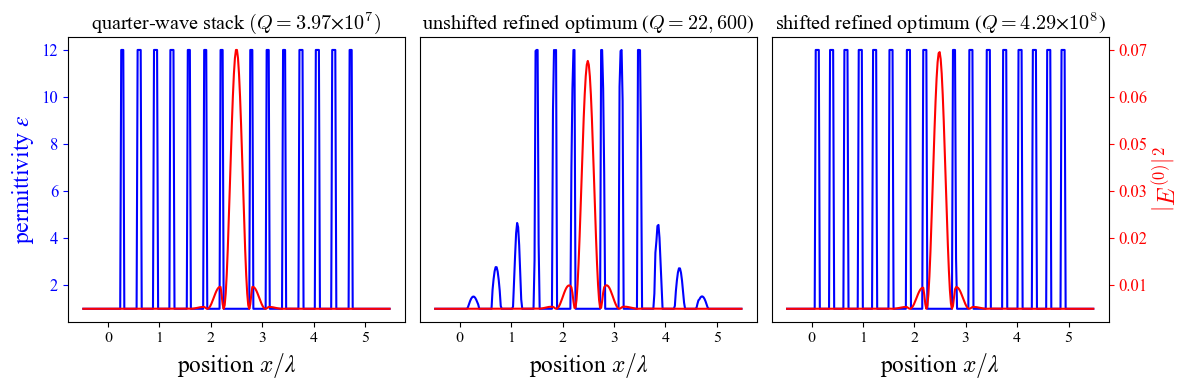

In [21]:
figure(figsize=(12, 4))

subplot(1, 3, 1)
plot(x, custom_epsilon, color="blue")
plot(x, (11/new_true_max)*u_fp .+ 1, color="red")
xlabel(L"position $x / λ$", fontsize=17)
ylabel(L"permittivity $ε$", color="blue", fontsize=17)
gca().tick_params(axis="y", colors="blue")
title(L"quarter-wave stack $(Q = 3.97 × 10^7)$", fontsize=14.5)

subplot(1, 3, 2)
plot(x, new_ε_opt, color="blue")
plot(x, (11/new_true_max)*u_new .+ 1, color="red")
xlabel(L"position $x / λ$", fontsize=17)
yticks([])
title(L"unshifted refined optimum ($Q = 22,600$)", fontsize=14.5)

subplot(1, 3, 3)
plot(x, best_ε_opt, color="blue")
plot(x, (11/new_true_max)*u_sr .+ 1, color="red")
xlabel(L"position $x / λ$", fontsize=17)
ylabel(L"$\left|E^{(0)}\right|^2$", color="red", fontsize=17)
gca().tick_params(axis="y", colors="red")
gca().yaxis.tick_right()        # move ticks to the right
gca().yaxis.set_label_position("right")  # move label to the right
ytick = gca().get_yticks()
gca().set_yticklabels(string.(round.(new_true_max .* (ytick .- 1) ./ 11; digits=2)))
title(L"shifted refined optimum ($Q = 4.29 × 10^8$)", fontsize=14.5)

tight_layout()
savefig("fabry_succref1d.pdf")

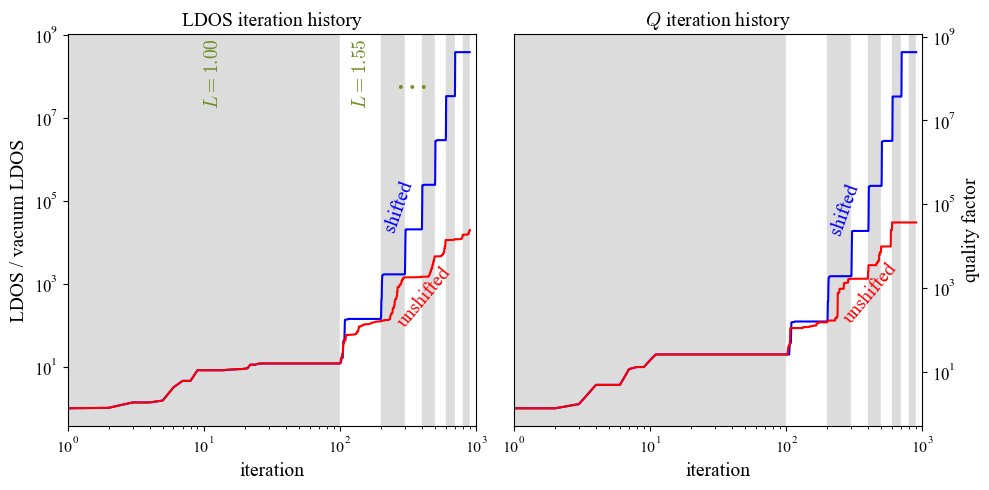

In [22]:
figure(figsize=(10, 5))

subplot(1, 2, 1)
loglog(make_smooth_plot(all_LDOS_vals) / LDOS_vac, color="blue")
loglog(make_smooth_plot(new_LDOS_vals) / LDOS_vac, color="red")
n_iters = length(all_LDOS_vals)
for i in 0:9
    x_start = i * 100
    x_end = min((i + 1) * 100, n_iters)
    color = (i % 2 == 0) ? "gainsboro" : "white"
    axvspan(x_start, x_end, color=color, zorder=0)
end
title("LDOS iteration history", fontsize=14)
xlabel("iteration", fontsize=14)
ylabel("LDOS / vacuum LDOS", fontsize=14)
gca().set_yticks([10.0^k for k in 1:2:9])
gca().tick_params(which="minor", bottom=true, left=false)
text(2e2, 2e4, "shifted", color="blue", fontsize=14, rotation=70)
text(2.5e2, 91, "unshifted", color="red", fontsize=14, rotation=50)
xlim(1, 1000)
text(10, 2e7, L"$L = 1.00$", color="olivedrab", fontsize=14, rotation=90)
text(1.22e2, 2e7, L"$L = 1.55$", color="olivedrab", fontsize=14, rotation=90)
text(250, 5e7, L"$…$", color="olivedrab", fontsize=25)


# Right plot
subplot(1, 2, 2)
loglog(make_smooth_plot(-real.(all_omegas) ./ 2imag.(all_omegas)), color="blue")
loglog(make_smooth_plot(-real.(new_omegas) ./ 2imag.(new_omegas)), color="red")
n_iters = length(all_LDOS_vals)
for i in 0:9
    x_start = i * 100
    x_end = min((i + 1) * 100, n_iters)
    color = (i % 2 == 0) ? "gainsboro" : "white"
    axvspan(x_start, x_end, color=color, zorder=0)
end
title(L"$Q$ iteration history", fontsize=14)
xlabel("iteration", fontsize=14)
ylabel("quality factor", fontsize=14)
gca().yaxis.tick_right()        # move ticks to the right
gca().yaxis.set_label_position("right")  # move label to the right
text(2e2, 2e4, "shifted", color="blue", fontsize=14, rotation=70)
text(2.5e2, 1.5e2, "unshifted", color="red", fontsize=14, rotation=50)
xlim(1, 1000)

tight_layout()
savefig("succ_ref_plot1d.pdf")

In [23]:
step_small = 0.05
small_ε_opt, small_LDOS_vals, small_omegas = succ_ref(L, 1, ε, ω, b, b; resolution=res, max_eval=50, step=step_small, ftol=0)

numevals = opt.numevals = 50
ω₀_opt = 6.279458447752138 - 0.2621228127543196im
Q_opt = 11.978084588993212
numevals = opt.numevals = 50
ω₀ = 6.283185264632458 - 0.2623853900698635im
Q = 11.973199542397309
numevals = opt.numevals = 50
ω₀ = 6.283185302884252 - 0.26238533391023805im
Q = 11.973202177972585
numevals = opt.numevals = 50
ω₀ = 6.283185296033054 - 0.13369991323042008im
Q = 23.497342459768596
numevals = opt.numevals = 50
ω₀ = 6.283185307272626 - 0.02016349982594926im
Q = 155.8059206365189
numevals = opt.numevals = 50
ω₀ = 6.283185306759699 - 0.02016349982455831im
Q = 155.80592063454776
numevals = opt.numevals = 50
ω₀ = 6.283185307465116 - 0.020163499826471313im
Q = 155.80592063725817
numevals = opt.numevals = 50
ω₀ = 6.283185307380595 - 0.020163499826242097im
Q = 155.80592063693345
numevals = opt.numevals = 50
ω₀ = 6.283185307182436 - 0.020163499825704714im
Q = 155.8059206361721
numevals = opt.numevals = 50
ω₀ = 6.283185307182436 - 0.020163499825704673im
Q = 155.8059206361724
num

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0015894422269321887, 0.0015932148999995763, 0.001631207981861311, 0.002200842232487165, 0.0012644143516178726, 0.002446919241034733, 0.005091892732486142, 0.007294122407440161, 0.002302283958535247, 0.013152809414975878  …  8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6, 8.854957947244726e6], ComplexF64[5.764179529545764 - 2.1834196863703044im, 5.762936643483027 - 2.184254760181721im, 5.750951691641168 - 2.1925685704139988im, 6.237802858388018 - 1.87042736046718im, 7.101520235204989 - 0.740389672867644im, 5.432067897901122 - 0.6308825980932127im, 5.995207476997895 - 0.740060219220602im, 5.958429072587017 - 0.260507832301084im, 7.292811847423832 - 0.2848310831415152im, 6.3641652115094836 - 0.3782952815986345im  …  7.191426889360326 - 5.10508

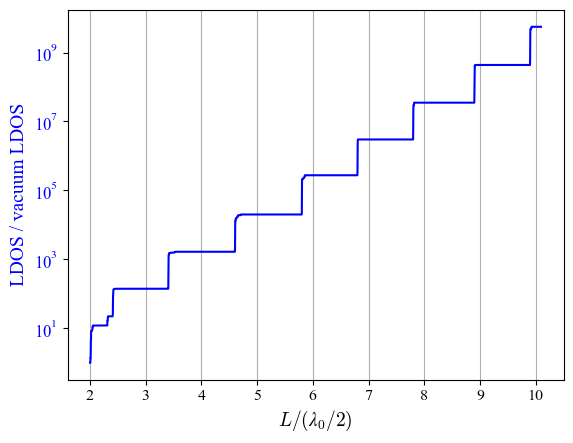

In [24]:
Ls = 0:length(small_LDOS_vals)-1
m = 0.05/50
Ls = m * Ls .+ 1
Ls = Ls / 2(0.25(1 + 0/sqrt(12)))
semilogy(Ls, make_smooth_plot(small_LDOS_vals) / LDOS_vac, color="blue")
xlabel(L"L / (λ_0/2)", fontsize=14)
ylabel("LDOS / vacuum LDOS", fontsize=14, color="blue")
yticks(color="blue")
grid(true, axis="x")
savefig("LDOS_v_L.pdf", bbox_inches="tight", pad_inches=0)

In [26]:
function grad_LDOS(L, ε, ω, b; resolution=20)
    A, _ = Maxwell1d(L, ε, ω; resolution)
    v = A \ vec(b)
    w = conj.(v)
    return -ω^2 * imag.(w.^2)
end

grad_LDOS (generic function with 1 method)

In [27]:
function grad_mod_LDOS(L, ε, ω, b, x₀; resolution=20)
    E = spdiagm(ε)
    E⁻¹ = spdiagm(1 ./ ε)
    A, _ = Maxwell1d(L, ε, ω; resolution)
    D² = A + ω^2 .* spdiagm(ε)
    C = E⁻¹ * A
    LU = lu(C)

    vals, vecs, _ = eigsolve(z -> LU \ z, x₀, 1, :LM, Arnoldi())
    vals = sqrt.(1 ./ vals .+ ω^2)
    ω₀, u₀ = vals[1], vecs[1]
    A₀ = D² - real(ω₀)^2 .* E
    v = A₀ \ vec(b)
    w = conj.(v)  

    ∂LDOS_∂ε = -imag.(real(ω₀)^2 .* w.^2)
    ∂LDOS_∂ω = -imag(2real(ω₀) .* sum(w.^2 .* conj.(ε)))
    ∂ω_∂ε = -ω₀ .* u₀.^2 ./ 2sum(u₀.^2 .* ε)

    return ∂LDOS_∂ε .+  ∂LDOS_∂ω .* real.(∂ω_∂ε)
end

grad_mod_LDOS (generic function with 1 method)

In [28]:
function Hess_LDOS(L, ε, ω, b; resolution=20)
    n = length(ε)
    Jac = []
    free_idx = findall(x -> x != 1 && x != 12, ε)

    for j in free_idx
        e_j = zeros(n)
        e_j[j] = 1

        f = h -> grad_LDOS(L, ε + h * e_j, ω, b; resolution)
        grad_dir = extrapolate_fdm(central_fdm(10, 1), f, 0)[1]
        push!(Jac, grad_dir[free_idx])
    end

    return hcat(Jac...)
end

Hess_LDOS (generic function with 1 method)

In [29]:
function Hess_mod_LDOS(L, ε, ω, b, x₀; resolution=20)
    n = length(ε)
    Jac = []
    free_idx = findall(x -> x != 1 && x != 12, ε)


    for j in free_idx
        e_j = zeros(n)
        e_j[j] = 1

        f = h -> grad_mod_LDOS(L, ε + h * e_j, ω, b, x₀; resolution)
        grad_dir = extrapolate_fdm(central_fdm(10, 1), f, 0)[1]
        push!(Jac, grad_dir[free_idx])
    end

    return hcat(Jac...)
end

Hess_mod_LDOS (generic function with 1 method)

In [30]:
A, x = Maxwell1d(L, ε_init, ω; resolution=res)
ω₀ = sqrt(Arnoldi_eig(A, vec(ε_init), ω, vec(b))[1])

6.283103517649515 - 0.001460917320955166im

In [31]:
Hess1 = Hess_LDOS(L, ε_init, real(ω₀), b; resolution=res);

In [32]:
Hess2 = Hess_mod_LDOS(L, ε_init, real(ω₀), b, b; resolution=res);

In [33]:
@show norm(Hess1 - hermitianpart(Hess1)) / norm(Hess1)
SVD1 = svdvals(Hess1)
κ_1 = maximum(SVD1) / minimum(SVD1)

norm(Hess1 - hermitianpart(Hess1)) / norm(Hess1) = 8.126730358160234e-10


3.850232111431828e9

In [34]:
@show norm(Hess2 - hermitianpart(Hess2)) / norm(Hess2)
SVD2 = svdvals(Hess2)
κ_2 = maximum(SVD2) / minimum(SVD2)

norm(Hess2 - hermitianpart(Hess2)) / norm(Hess2) = 2.959214810872219e-11


838067.6180672155

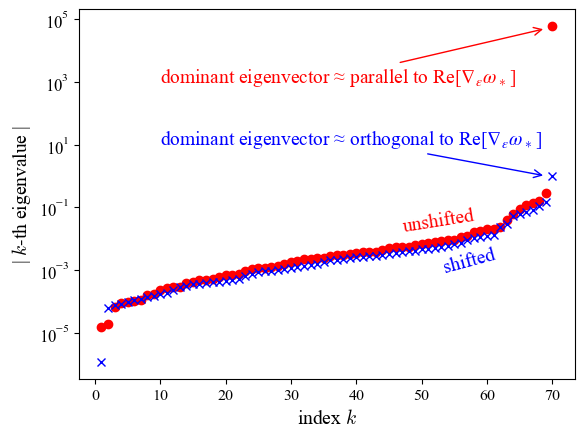

In [35]:
semilogy(1:length(SVD1), reverse(SVD1), "ro")
semilogy(1:length(SVD2), reverse(SVD2), "bx")
xlabel(L"index $k$", fontsize=14)
ylabel(L"| $k$-th eigenvalue |", fontsize=14)
text(53, 8.5e-4, "shifted", color="blue", fontsize=14, rotation=15)
text(47, 1.78e-2, "unshifted", color="red", fontsize=14, rotation=9)

annotate(L"dominant eigenvector ≈ parallel to Re[$∇_{ε} ω_*$]", 
         xy=(69, 50000),        # point to (x=5, y=0.5)
         xytext=(10, 1e3),      # place text at (x=7, y=0.8)
         color="red",
         arrowprops=Dict("arrowstyle"=>"->", "color"=>"red"),
         fontsize=14)
annotate(L"dominant eigenvector ≈ orthogonal to Re[$∇_{ε} ω_*$]", 
         xy=(69, 1),        # point to (x=5, y=0.5)
         xytext=(10, 1e1),      # place text at (x=7, y=0.8)
         color="blue",
         arrowprops=Dict("arrowstyle"=>"->", "color"=>"blue"),
         fontsize=14)


savefig("spectrum1d.pdf")
savefig("spectrum1d.svg")

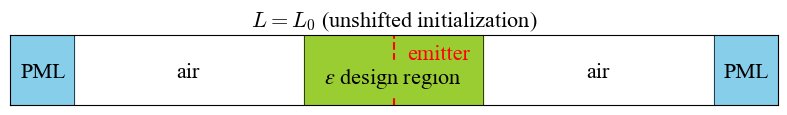

In [36]:
# Set up the figure and axis
figure(figsize=(8, 1))
xlim(-0.5, 5.5)
ylim(0, 1)  # Dummy y-range

# Color regions
axvspan(-0.5, 0, color="skyblue")
axvspan(1.8, 3.2, color="yellowgreen")
axvspan(5, 5.5, color="skyblue")
text(-0.42, 0.40, "PML", fontsize=16)
text(5.08, 0.40, "PML", fontsize=16)
text(1-0.2, 0.40, "air", fontsize=16)
text(4, 0.40, "air", fontsize=16)

# Add red vertical line at center
axvline(x=2.5, color="red", linestyle="--")
axvline(x=1.8, color="black", linewidth=0.5)
axvline(x=3.2, color="black", linewidth=0.5)
axvline(x=0, color="black", linewidth=0.5)
axvline(x=5, color="black", linewidth=0.5)
text(1.95, 0.31, L"$ε$ design region", bbox=Dict("facecolor" => "yellowgreen", "edgecolor" => "yellowgreen", "boxstyle" => "square"), fontsize=16)
text(2.6, 0.65, "emitter", color="red", bbox=Dict("facecolor" => "yellowgreen", "edgecolor" => "yellowgreen", "boxstyle" => "square"), fontsize=16)

# Add black regions outside full axis (optional, for visual emphasis)
# Here, skyblue padding suffices, but if you meant outer area in black, we’d need figure background color changes.

# Ticks and labels
xticks([])
yticks([])

tight_layout()
title(L"$L=L_0$ (unshifted initialization)", fontsize=16)
savefig("0_region1d.svg", bbox_inches="tight", pad_inches=0.1)

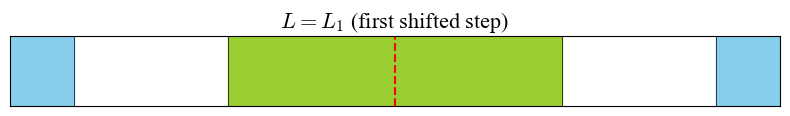

In [37]:
# Set up the figure and axis
figure(figsize=(8, 1))
xlim(-0.5, 5.5)
ylim(0, 1)  # Dummy y-range

# Color regions
axvspan(-0.5, 0, color="skyblue")
axvspan(1.2, 3.8, color="yellowgreen")
axvspan(5, 5.5, color="skyblue")

# Add red vertical line at center
axvline(x=2.5, color="red", linestyle="--")
axvline(x=1.2, color="black", linewidth=0.5)
axvline(x=3.8, color="black", linewidth=0.5)
axvline(x=0, color="black", linewidth=0.5)
axvline(x=5, color="black", linewidth=0.5)

# Add black regions outside full axis (optional, for visual emphasis)
# Here, skyblue padding suffices, but if you meant outer area in black, we’d need figure background color changes.

# Ticks and labels
xticks([])
yticks([])

tight_layout()
title(L"$L=L_1$ (first shifted step)", fontsize=16)
savefig("1_region1d.svg", bbox_inches="tight", pad_inches=0.1)

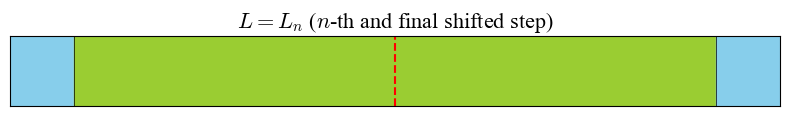

In [38]:
# Set up the figure and axis
figure(figsize=(8, 1))
xlim(-0.5, 5.5)
ylim(0, 1)  # Dummy y-range

# Color regions
axvspan(-0.5, 0, color="skyblue")
axvspan(0, 5, color="yellowgreen")
axvspan(5, 5.5, color="skyblue")

# Add red vertical line at center
axvline(x=2.5, color="red", linestyle="--")
axvline(x=0, color="black", linewidth=0.5)
axvline(x=5, color="black", linewidth=0.5)

# Add black regions outside full axis (optional, for visual emphasis)
# Here, skyblue padding suffices, but if you meant outer area in black, we’d need figure background color changes.

# Ticks and labels
xticks([])
yticks([])

tight_layout()
title(L"$L=L_n$ ($n$-th and final shifted step)", fontsize=16)
savefig("k_region1d.svg", bbox_inches="tight", pad_inches=0.1)

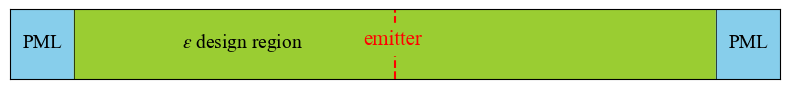

In [39]:
# Set up the figure and axis
figure(figsize=(8, 1))
xlim(-0.5, 5.5)
ylim(0, 1)  # Dummy y-range

# Color regions
axvspan(-0.5, 0, color="skyblue")
axvspan(0, 5, color="yellowgreen")
axvspan(5, 5.5, color="skyblue")
text(-0.4, 0.45, "PML", fontsize=14)
text(5.1, 0.45, "PML", fontsize=14)
text(1-0.16, 0.45, L"$ε$ design region", fontsize=14)
text(2.25, 0.5, "emitter", color="red", bbox=Dict("facecolor" => "yellowgreen", "edgecolor" => "yellowgreen", "boxstyle" => "square"), fontsize=15)

# Add red vertical line at center
axvline(x=2.5, color="red", linestyle="--")
axvline(x=0, color="black", linewidth=0.5)
axvline(x=5, color="black", linewidth=0.5)

# Add black regions outside full axis (optional, for visual emphasis)
# Here, skyblue padding suffices, but if you meant outer area in black, we’d need figure background color changes.

# Ticks and labels
xticks([])
yticks([])

tight_layout()
savefig("region1d.pdf")

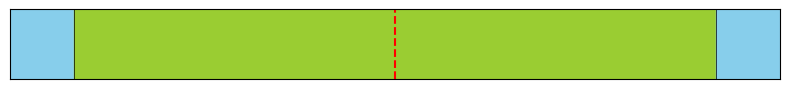

In [40]:
# Set up the figure and axis
figure(figsize=(8, 1))
xlim(-0.5, 5.5)
ylim(0, 1)  # Dummy y-range

# Color regions
axvspan(-0.5, 0, color="skyblue")
axvspan(0, 5, color="yellowgreen")
axvspan(5, 5.5, color="skyblue")

# Add red vertical line at center
axvline(x=2.5, color="red", linestyle="--")
axvline(x=0, color="black", linewidth=0.5)
axvline(x=5, color="black", linewidth=0.5)

# Add black regions outside full axis (optional, for visual emphasis)
# Here, skyblue padding suffices, but if you meant outer area in black, we’d need figure background color changes.

# Ticks and labels
xticks([])
yticks([])

tight_layout()
savefig("region1d_no_text.svg")

In [41]:
u = eigvecs(Hess1)[:,1]
A, _ = Maxwell1d(L, ε_init, real(ω₀); resolution=res)
v = Eigengradient(A, ε_init, real(ω₀), b)[2]
free_idx = findall(x -> 1 < x < 12, ε_init)
v = normalize(real(v[free_idx]))

@show acosd(u' * v), acosd(-u' * v)
u' * v

(acosd(u' * v), acosd(-(u') * v)) = (0.0005471376954135111, 179.9994528623046)


0.9999999999544049